# Data Visualization

The dataset has the following folders:

Genres original — A collection of 10 genres with 100 audio files each, all having a length of 30 seconds (the famous GTZAN dataset, the MNIST of sounds)

Images original — A visual representation for each audio file. One way to classify data is through neural networks because NN’s usually take in some sort of image representation.

2 CSV files — Containing features of the audio files. One file has the mean and variance computed over multiple features that can be extracted from an audio file for each song (30 seconds long). The other file has the same structure, but the songs are split before into 3 seconds audio files.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio

In [4]:
df=pd.read_csv('./DATA/features_3_sec.csv') 
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
df.shape

(9990, 60)

In [6]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [7]:
df = df.drop(labels='filename', axis=1)

- **`librosa,load()` isn't compatible with the latest `numpy` version (1.24.1)**

In [8]:
print(np.__version__)

1.23.5


In [9]:
sample_recording ="./DATA/genres_original/country/country.00069.wav"
y, sr= librosa.load(sample_recording)
print(type (y), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [10]:
librosa.load(sample_recording, sr=45600)

(array([ 0.0286181 ,  0.04970018,  0.06336724, ..., -0.05689329,
        -0.04915636, -0.02463653], dtype=float32),
 45600)

In [11]:
import IPython 
IPython.display. Audio (y, rate=sr)

<br>

## Raw Wave Files

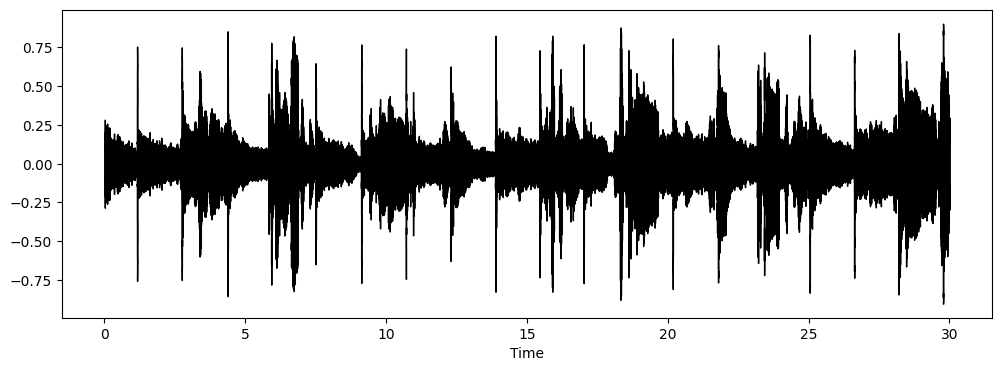

In [12]:
plt.figure(figsize = (12, 4))
librosa.display.waveshow(y, color = "#000000")
plt.show()

<br>

## Spectrogram

A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

/tmp/ipykernel_104873/2858478584.py:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')


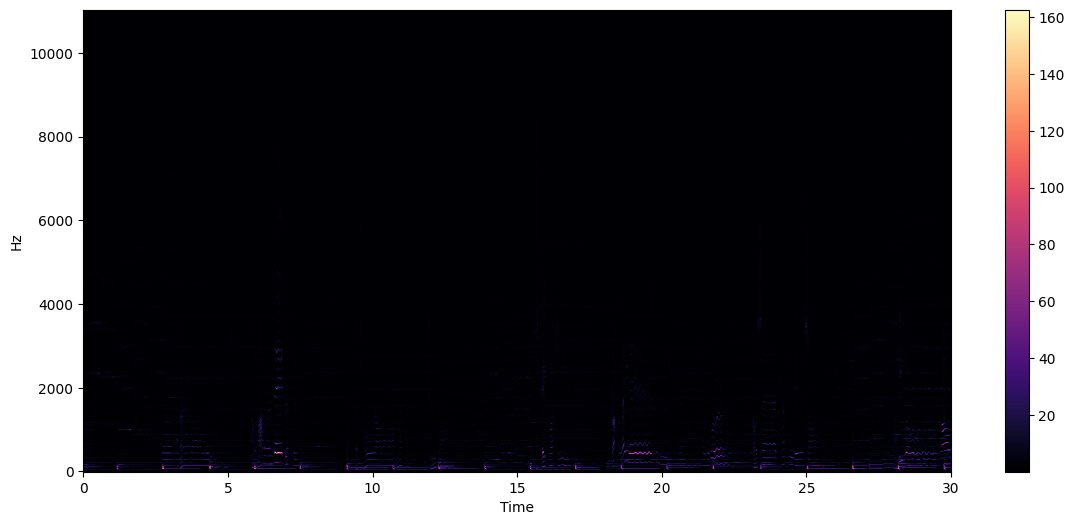

In [13]:
stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))

librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

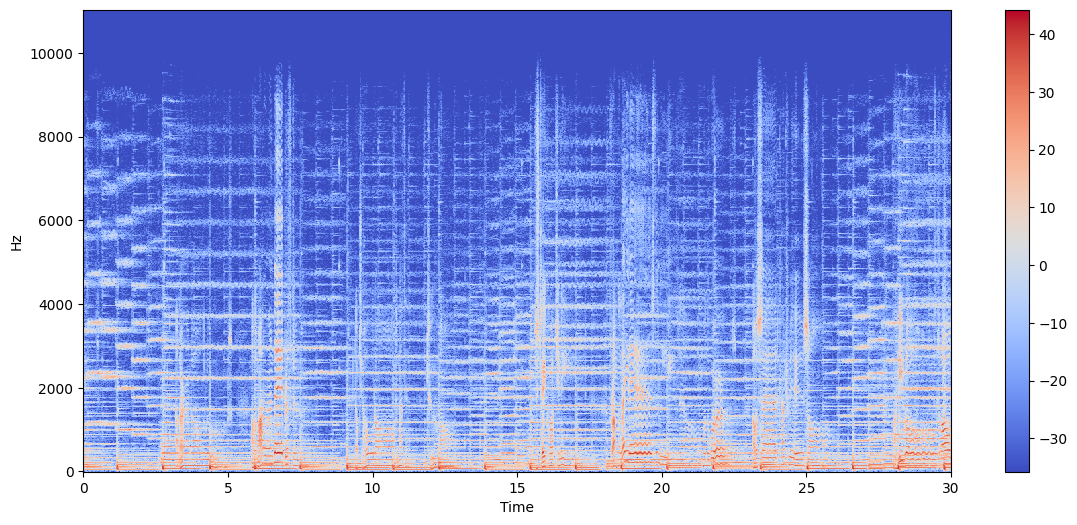

In [14]:
stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize = (14, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

<br>

## Spectral Rolloff

- **Changed name 'data' to 'y' because it was also a module name in `librosa`**

Spectral Rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

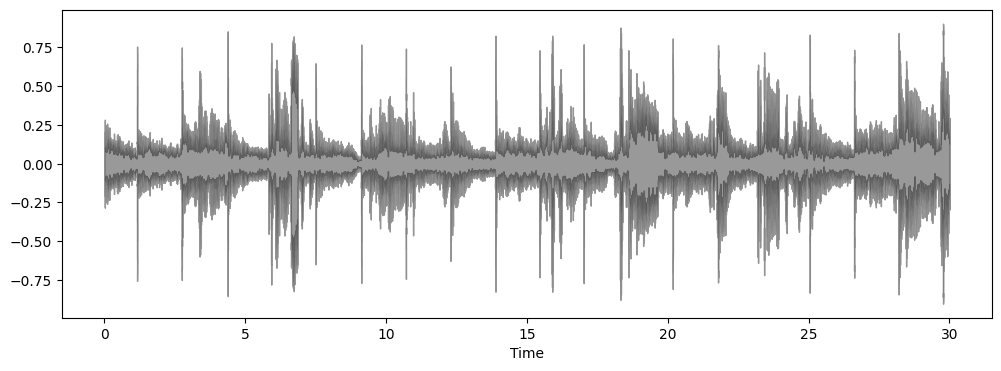

In [15]:
from sklearn.preprocessing import normalize
import librosa.display # add this line
y, sr = librosa.load(sample_recording)
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0] # add y= before y
plt.figure(figsize = (12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.4, color="#000000") # change data to y

<br>

## Chroma Feature

It is a powerful tool for analyzing music features whose pitches can be meaningfully categorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation.

In [16]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

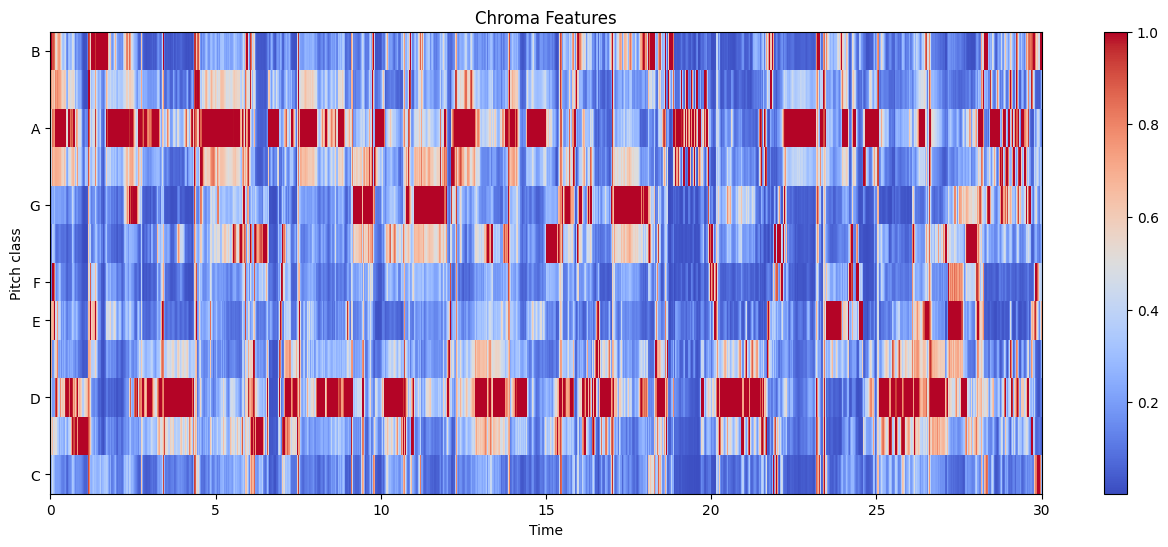

In [17]:
plt.figure(figsize = (16, 6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

<br>

## Zero Crossing Rate

Zero crossing is said to occur if successive samples have different algebraic signs. The rate at which zero-crossings occur is a simple measure of the frequency content of a signal. Zero-crossing rate is a measure of the number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero.

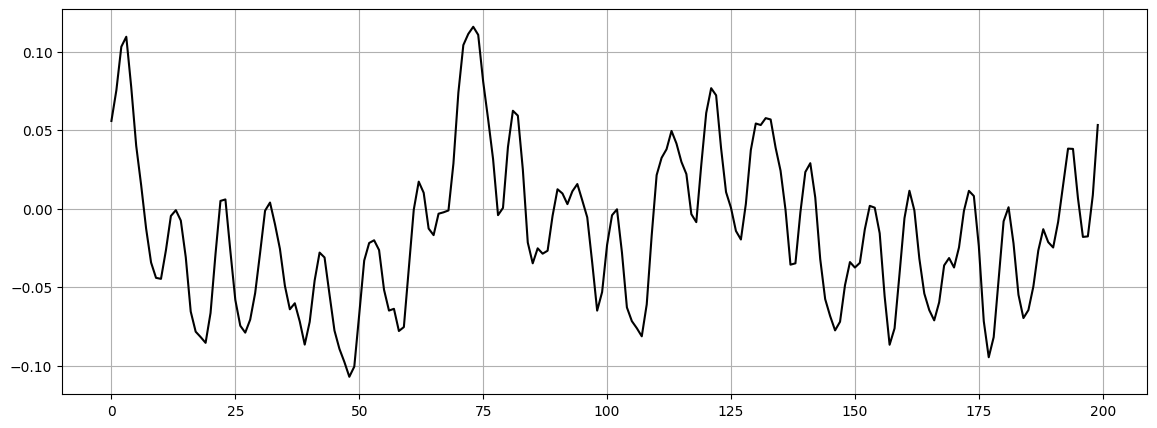

In [18]:
start = 1000
end = 1200
plt.figure(figsize=(14, 5))
plt.plot(y[start:end], color="#000000")
plt.grid()

The number of time *zero-crossing* has occured is calculated to be:

In [19]:
zero_cross_rate = librosa.zero_crossings(y[start:end], pad=False)
print("The number of zero-crossings is: ", sum(zero_cross_rate))

The number of zero-crossings is:  32
